<a href="https://www.kaggle.com/code/gerardomacias/k-means-algorithm-from-scratch?scriptVersionId=221872385" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

    def fit(self, X, max_iterations=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0),
                                           size=(self.k, X.shape[1]))
        for _ in range(max_iterations):
            y = []

            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y


In [4]:
from sklearn.datasets import make_blobs

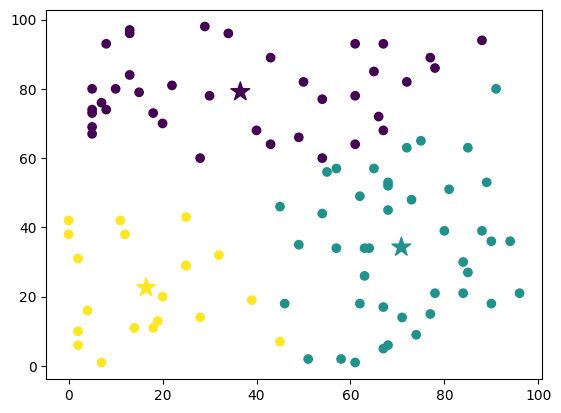

In [5]:
random_points = np.random.randint(0,100, (100, 2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)),
            marker='*', s=200)

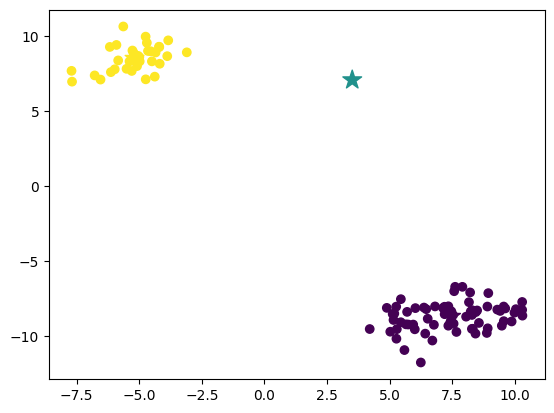

In [6]:
data = make_blobs(n_samples=100, n_features=2, centers=3)
random_points_2 = data[0]
kmeans_2 = KMeansClustering(k=3)
labels_2 = kmeans_2.fit(random_points_2)

plt.scatter(random_points_2[:, 0], random_points_2[:, 1], c=labels_2)
plt.scatter(kmeans_2.centroids[:, 0], kmeans_2.centroids[:, 1], c=range(len(kmeans_2.centroids)),
            marker='*', s=200)